<a href="https://colab.research.google.com/github/bnubald/EQ-live/blob/master/Tutorials/1.1_Defining_a_Parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A parameter is one of the main building blocks in Effective Quadratures. Let $s$ be a parameter defined on a domain $\mathcal{D} \in \mathbb{R}$. The support of the domain $\mathcal{D}$ may be:

* closed [a, b]
* semi-infinite (−$\infty$, $b$) or [*a*, $\infty$)
* infinite (−$\infty$,$\infty$)

Further, let us assume that this parameter is characterized by a positive weight function $\rho(s)$, which may be interpreted as the probability density function (PDF) of $s$, which readily implies that:

$$\int_{\mathcal{D}}^{} \rho(s) ds = 1$$

We now demonstrate some basic functionality of this parameter. First consider the case where $\rho(s) = \mathcal{N}(0, 1)$ is a standard Gaussian distribution with a mean of 0.0 and a variance of 1.0. We then plot its PDF and cumulative density function (CDF) and demonstrate how we can generate random samples from this distribution.

In [1]:
#_______________________________________________________________________
# Initial check to see if in Google Colab environment
import sys
IN_COLAB = 'google.colab' in sys.modules

# Install effective-quadratures if in Google Colab environment
# and not already installed
if IN_COLAB and 'equadratures' not in sys.modules:
    !pip install equadratures

     |████████████████████████████████| 102kB 5.4MB/s 


Import packages and define parameter, $s$:

In [0]:
from equadratures import Parameter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#_______________________________________________________________________
# Since defining a normal distribution, in this case,
# shape_parameter_A = mean
# shape_parameter_B = variance
s = Parameter(distribution='normal', shape_parameter_A = 0.0, shape_parameter_B = 1.0, order=3)

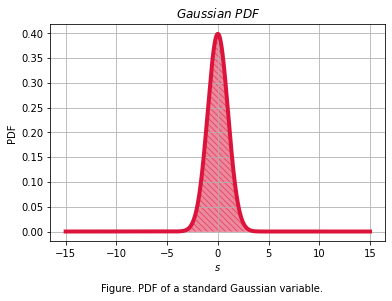

In [3]:
#_______________________________________________________________________
# Calculate PDF & using default values in code
# Note: 'Effective-Quadratures/equadratures/distributions/gaussian.py' defines
#	the no. of points over which to generate the PDF over (RECURRENCE_PDF_SAMPLES = 8000)

s_values, pdf = s.get_pdf()
s_values, cdf = s.get_cdf()

#_______________________________________________________________________
# Plot PDF
fig = plt.figure()
plt.title('$Gaussian\ PDF$')
plt.xlabel('$s$')
plt.ylabel('PDF')
plt.plot( s_values, pdf, '-', c='crimson', lw=4 )
plt.fill_between( s_values,  pdf*0.0, pdf, color="crimson" , interpolate=True, \
                  hatch="\\\\\\\\", linewidth=0.5, alpha=0.5 )
plt.grid()
caption = 'Figure. PDF of a standard Gaussian variable.'
fig.text(0.5, -0.05, caption, ha='center');

followed by the a plot of the CDF:

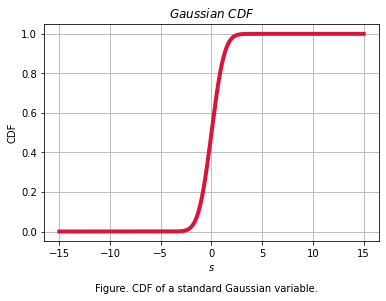

In [4]:
#_______________________________________________________________________
#Plot CDF
fig = plt.figure()
plt.title('$Gaussian\ CDF$')
plt.xlabel('$s$')
plt.ylabel('CDF')
plt.plot( s_values, cdf, '-', c='crimson', lw=4 )
plt.grid()
caption = 'Figure. CDF of a standard Gaussian variable.'
fig.text(0.5, -0.05, caption, ha='center');

Now, we will use the get_samples() functionality to create a histogram.

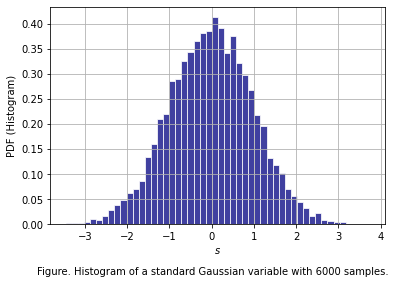

In [5]:
s_samples = s.get_samples(6000)

#_______________________________________________________________________
#Plot histogram of gaussian with random samples
fig = plt.figure()
n, bins, patches = plt.hist( s_samples, 50, density=True, facecolor='navy', alpha=0.75,\
                             edgecolor='w')
plt.xlabel('$s$')
plt.ylabel('PDF (Histogram)')
plt.grid()
caption = 'Figure. Histogram of a standard Gaussian variable with 6000 samples.'
fig.text(0.5, -0.05, caption, ha='center');

One can repeat the above for a range of distributions. We provide a few additional definitions below. First, consider the example of a truncated Gaussian distribution,

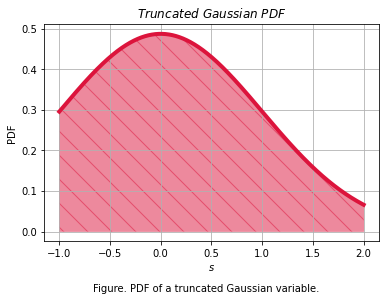

In [6]:
#_______________________________________________________________________
#Truncated gaussian distribution (Limiting the x-values)
s = Parameter( distribution='truncated-gaussian', lower=-1.0, upper=2.0, \
               shape_parameter_A = 0.0, shape_parameter_B = 1.0, order=3 )
s_values, pdf = s.get_pdf()

#_______________________________________________________________________
# Plot PDF
fig = plt.figure()
plt.title('$Truncated\ Gaussian\ PDF$')
plt.xlabel('$s$')
plt.ylabel('PDF')
plt.plot( s_values, pdf, '-', c='crimson', lw=4 )
plt.fill_between( s_values,  pdf*0.0, pdf, color="crimson" , interpolate=True, \
                  hatch="\\", linewidth=0.5, alpha=0.5 )
plt.grid()
caption = 'Figure. PDF of a truncated Gaussian variable.'
fig.text(0.5, -0.05, caption, ha='center');

followed by that of a custom distribution—based on user supplied data.

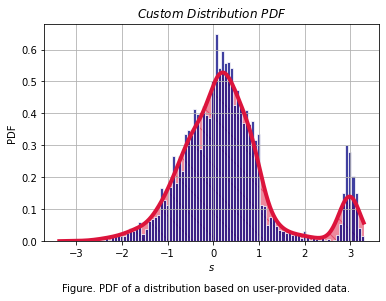

In [7]:
#_______________________________________________________________________
#Defining a custom distribution (User-specified)
param1 = np.random.rand(1000)
param2 = np.random.randn(1200)
param3 = np.random.randn(1300)*0.5 - 0.2
param4 = np.random.randn(300)*0.1 + 3.0

data = np.hstack( [param1, param2, param3, param4] )

s = Parameter( distribution='custom', data=data, order=3 )
s_values, pdf = s.get_pdf()
s_values, cdf = s.get_cdf()
s_samples = s.get_samples(6000)

#_______________________________________________________________________
# Plot PDF
fig = plt.figure()
plt.title('$Custom\ Distribution\ PDF$')
plt.xlabel('$s$')
plt.ylabel('PDF')
plt.plot( s_values, pdf, '-', c='crimson', lw=4 )
plt.fill_between( s_values,  pdf*0.0, pdf, color="crimson" , interpolate=True, \
                  hatch="\\", linewidth=0.5, alpha=0.5 )
n, bins, patches = plt.hist( data, 100, density=True, facecolor='navy', alpha=0.75,\
                             edgecolor='w')
plt.grid()
caption = 'Figure. PDF of a distribution based on user-provided data.'
fig.text(0.5, -0.05, caption, ha='center');